# Select Important Features via Various Classification Approaches

<b>Author</b>: Chan, Chun-Hsiang (<b>TooDou</b>) <b>@</b> D04228002 NTU GEOG

In this project, we would like to analyze the microsoft malware dataset. Through data-driven aspect, we need to extract the important features and identify their feature types (MD1, SEC, !G, DP, IMG!, REG, MISC, ENT, IMG2, SYM, OPC, STR and API, etc.), moreover, we also need to figure out the useless features from the original dataset.
Although this paper adopted "random forest" as the classifier, I wanted to test other classifiers, and attemped to know the accuracy of them. As a result, there are five classifiers have been adopted, including random forest, extra trees, decision tree, AdaBoost and KNN.

For the training dataset, we have 1805 features (included the class type), and 10868 rows of data.<br />
For the test dataset, we have 1805 features (included the class type), and 10873 rows of data.

1. load training data and test data
2. try different models (parameters changed)
3. plot the accuracy and found the best parameters of this model
4. output the results

<b>Reference dataset</b>: https://github.com/ManSoSec/Microsoft-MalwareChallenge <br />
<b>Reference paper</b>: https://arxiv.org/abs/1511.04317

<b>Python</b> version: 3.6.1<br />
<b>Packages requirements</b>:
1. os
2. pandas ver. 0.19.2
3. matplotlib ver. 2.0.0
4. numpy ver. 1.11.3
5. sklearn ver. 0.18.1


# Part I. Load Data and Import Packages

## 1. Set the Path and Load Data

In [1]:
# import packages
import os
import pandas as pd

# load dateset
os.getcwd()
os.chdir('/Users/May/documents/python_code/Microsoft-Malware-Challenge/Dataset/train')
train = pd.read_csv('LargeTrain.csv')
os.chdir('/Users/May/documents/python_code/Microsoft-Malware-Challenge/Dataset/test/')
test = pd.read_csv('LargeTest.csv')

## 2. Overview the Whole Dataset

We applied two functions to view our Microsoft malware dataset (train and test), including head( ) and describe( ).<br />
For the training dataset, we have 1805 features (included the class type), and 10868 rows of data.<br />
For the test dataset, we have 1805 features (included the class type), and 10873 rows of data.<br />
<br />
At last, we plot two figures to present the class distribution of training and test dataset.

In [2]:
# import necessary packages
import matplotlib.pyplot as plt
import numpy as np

### 2.1 Training Dataset

In [3]:
# view the training dataset
train.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
0,3,3,689,18,6,890,6,39,17,88,...,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0,2
1,3,3,583,15,5,1574,5,6,7,30,...,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0,8
2,3,4,2796,15,5,625,5,58,11,152,...,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0,9
3,3,3,373,27,9,615,9,16,10,34,...,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0,9
4,3,3,77,12,4,66,4,3,0,5,...,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0,1


In [4]:
# statistic table of training dataset
train.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
count,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,...,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000
mean,3.279076,3.500552,1990.713747,11.586861,4.934671,1264.397957,3.845786,16.559717,5.552908,31.011502,...,10840.809901,5067.437155,19206.655962,4861.557508,13055.646853,19358.439179,7070.320482,66860.996319,53866.402926,4.017851
std,0.936296,3.725526,5827.675688,8.986606,2.637995,3902.380905,2.925528,23.203308,7.285566,37.299279,...,18299.174269,4215.541706,23749.881264,4084.822497,10759.321012,24745.353583,5963.469543,66364.332846,53145.701929,2.684621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,3.000000,58.000000,3.000000,4.000000,37.000000,1.000000,6.000000,0.000000,13.000000,...,1124.000000,1321.000000,3262.000000,1158.750000,3108.000000,3130.750000,1964.750000,11990.250000,7706.000000,2.000000
50%,3.000000,3.000000,513.000000,12.000000,4.000000,364.000000,4.000000,11.000000,4.000000,19.000000,...,5585.500000,5323.500000,14902.000000,5129.500000,14752.000000,14921.000000,7437.500000,62384.500000,45639.000000,3.000000
75%,3.000000,4.000000,1652.500000,18.000000,6.000000,1044.000000,5.000000,17.000000,9.000000,33.250000,...,8464.250000,6040.250000,22314.500000,6020.250000,16078.000000,21464.750000,8414.500000,73929.500000,68580.000000,6.000000
max,34.000000,263.000000,107775.000000,85.000000,58.000000,86560.000000,21.000000,377.000000,166.000000,492.000000,...,189297.000000,24914.000000,214551.000000,25502.000000,63895.000000,212548.000000,38582.000000,397109.000000,322765.000000,9.000000


In [5]:
# get all class types
classType = ['Ramnit (R)','Lollipop (L)', 'Kelihos_ver3 (K3)', 'Vundo (V)',\
                      'Simda (S)','Tracur (T)', 'Kelihos_ver1 (K1)', 'Obfuscator.ACY (O)', 'Gatak(G)']
classType

['Ramnit (R)',
 'Lollipop (L)',
 'Kelihos_ver3 (K3)',
 'Vundo (V)',
 'Simda (S)',
 'Tracur (T)',
 'Kelihos_ver1 (K1)',
 'Obfuscator.ACY (O)',
 'Gatak(G)']

In [6]:
# plot the class distribution of training data
# observation on the statistics
# count the amount
countTrainRow_class = np.zeros(9)
print('Numbers of rows in each class (Training Data)')
for i in range(1,10):
    countTrainRow_class[i-1] = sum(train.Class==i)
    print(classType[i-1],':' , countTrainRow_class[i-1])

Numbers of rows in each class (Training Data)
Ramnit (R) : 1541.0
Lollipop (L) : 2478.0
Kelihos_ver3 (K3) : 2942.0
Vundo (V) : 475.0
Simda (S) : 42.0
Tracur (T) : 751.0
Kelihos_ver1 (K1) : 398.0
Obfuscator.ACY (O) : 1228.0
Gatak(G) : 1013.0


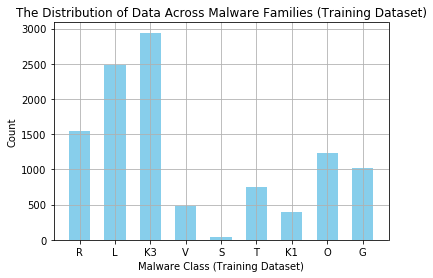

In [7]:
# show the distribution
ind = np.arange(9)+1.5
plt.bar(ind,countTrainRow_class,0.6,color='skyblue',tick_label=\
        ['R','L','K3','V','S','T','K1','O','G'])
plt.xlabel('Malware Class (Training Dataset)')
plt.ylabel('Count')
plt.title('The Distribution of Data Across Malware Families (Training Dataset)')
plt.xticks(ind)
plt.grid(True)
plt.show() 

### 2.2 Test Dataset

In [8]:
# view the test dataset
test.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
0,10,10,137,18,6,90,6,27,0,31,...,1393,1310,1440,3302,1393,3434,3153,1788,13968,12444
1,9,9,108,12,4,135,4,17,2,39,...,1146,979,1139,2965,1011,2925,2742,1464,13360,12201
2,11,11,73,21,7,155,7,53,4,67,...,1435,1093,1446,2986,1116,3073,2991,1609,14162,12916
3,3,3,78,0,12,133,0,60,3,117,...,891,889,876,2488,883,2465,2461,1157,11004,9908
4,3,3,37,12,4,44,4,3,0,14,...,5644,5657,5641,15300,5864,15428,15124,7624,68675,65623


In [9]:
# statistic table of test dataset
test.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
count,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,...,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000
mean,3.271774,3.463809,1854.658972,11.471259,4.894509,1178.450658,3.815506,16.263313,5.475490,30.322726,...,5103.914007,10988.594500,5089.921825,19265.238940,4865.849352,13058.873540,19408.878690,7118.167755,66562.498482,53450.453509
std,0.947961,2.721734,5235.835749,8.822817,2.591483,3703.120404,2.895531,21.712164,7.238129,35.784613,...,4287.216688,18370.696438,4267.506497,23768.632577,4104.740919,10806.929553,24739.694841,6113.708690,66124.332105,52841.429996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,46.000000,3.000000,4.000000,36.000000,1.000000,6.000000,0.000000,13.000000,...,1316.000000,1119.000000,1323.000000,3275.000000,1144.000000,3094.000000,3109.000000,1923.000000,11912.000000,7664.000000
50%,3.000000,3.000000,510.000000,12.000000,4.000000,352.000000,4.000000,11.000000,4.000000,18.000000,...,5331.000000,5597.000000,5339.000000,14911.000000,5120.000000,14739.000000,14912.000000,7439.000000,59928.000000,43830.000000
75%,3.000000,4.000000,1551.000000,15.000000,6.000000,993.000000,5.000000,17.000000,9.000000,33.000000,...,6033.000000,8960.000000,6043.000000,22489.000000,6022.000000,16078.000000,21393.000000,8406.000000,73565.000000,68573.000000
max,21.000000,126.000000,95866.000000,73.000000,41.000000,104069.000000,24.000000,390.000000,165.000000,492.000000,...,22952.000000,156141.000000,22901.000000,170483.000000,24263.000000,62666.000000,184903.000000,59898.000000,376761.000000,313716.000000


In [10]:
# plot the class distribution of test data
# observation on the statistics
# count the amount
countTestRow_class = np.zeros(9)
print('Numbers of rows in each class (Test Data)')
for i in range(1,10):
    countTestRow_class[i-1] = sum(test.Class==i)
    print(classType[i-1],':' , countTestRow_class[i-1])

Numbers of rows in each class (Test Data)


AttributeError: 'DataFrame' object has no attribute 'Class'

# Part II. Build Classification Models

We utilized the sklearn packages to bulid up our classifier models, including random forest, extra trees, decision tree, AdaBoost and KNN. In order to realize the model performance, we added cross validation score from sklearn.

In [11]:
# import packages
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

To separte the dataset into two parts: data (for building the model) and class (for identify their types)

## 1. Preview the Training Dataset for Modeling of Classification

Due to the features in the original training dataset, we need to separte the original training dataset into two parts, one is data, and the other is class type. 

In [12]:
# data for analysis
data = train[train.columns[np.arange(1804)]]
data.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
0,3,3,689,18,6,890,6,39,17,88,...,8658.0,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0
1,3,3,583,15,5,1574,5,6,7,30,...,650.0,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0
2,3,4,2796,15,5,625,5,58,11,152,...,16918.0,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0
3,3,3,373,27,9,615,9,16,10,34,...,9734.0,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0
4,3,3,77,12,4,66,4,3,0,5,...,1256.0,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0


In [13]:
# data for analysis
classType = train[train.columns[1804]]
classType.head()

0    2
1    8
2    9
3    9
4    1
Name: Class, dtype: int64

## 2. Build the Classification Models

In [14]:
# build random forest classification model
rfc_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [15]:
# build decision tree classification model
dtc_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)

In [16]:
# build extra trees classification model
etc_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

In [17]:
# build AdaBoost classification model
abc_clf = AdaBoostClassifier(n_estimators=10)

In [18]:
# build K Nearest Neighbors classification model
knn_clf = KNeighborsClassifier(n_neighbors=5)

## 3. Evaluate Classification and Cross Validation by Using K-fold (K = 10)

In [19]:
# cross validation with 10-fold validation for random forest classification
rfc_scores = cross_val_score(rfc_clf, data, classType, cv=10)

In [21]:
# cross validation with 10-fold validation for decision tree classification
dtc_scores = cross_val_score(dtc_clf, data, classType, cv=10)

In [22]:
# cross validation with 10-fold validation for extra trees classification
etc_scores = cross_val_score(etc_clf, data, classType, cv=10)

In [23]:
# cross validation with 10-fold validation for AdaBoost classification
abc_scores = cross_val_score(abc_clf, data, classType, cv=10)

In [24]:
# cross validation with 10-fold validation for K Nearest Neighbors classification
knn_scores = cross_val_score(knn_clf, data, classType, cv=10)

## 4. Statistic Result of Cross Validation on Classification

In [25]:
# calculate the Accuracy of random forest classification and show them on the screen
print('Model Accuracy of Random Forest Classification of Each Fold')
print(rfc_scores)
print('\nAverage Accuracy of Random Forest Classification')
print(rfc_scores.mean())

Model Accuracy of Random Forest Classification of Each Fold
[ 0.99450549  0.98990826  0.99448529  0.99264029  0.99264029  0.99355433
  0.99355433  0.99539595  0.99445983  0.99076639]

Average Accuracy of Random Forest Classification
0.993191046179


In [26]:
# calculate the Accuracy of decision tree classification and show them on the screen
print('Accuracy of Decision Tree Classification of Each Fold')
print(dtc_scores)
print('\nAverage Accuracy of Decision Tree Classification')
print(dtc_scores.mean())

Accuracy of Decision Tree Classification of Each Fold
[ 0.99358974  0.99449541  0.99172794  0.98620055  0.98712052  0.99171271
  0.98987109  0.99631676  0.98707295  0.99076639]

Average Accuracy of Decision Tree Classification
0.990887405243


In [27]:
# calculate the Accuracy of extra trees classification and show them on the screen
print('Model Accuracy of Extra Trees Classification of Each Fold')
print(etc_scores)
print('\nAverage Accuracy of Extra Trees Classification')
print(etc_scores.mean())

Model Accuracy of Extra Trees Classification of Each Fold
[ 0.99450549  0.99082569  0.99448529  0.99080037  0.98804048  0.98987109
  0.98987109  0.99631676  0.99168975  0.99168975]

Average Accuracy of Extra Trees Classification
0.991809575631


In [28]:
# calculate the Accuracy of AdaBoost classification and show them on the screen
print('Accuracy of AdaBoost classification of Each Fold')
print(abc_scores)
print('\nAverage Accuracy of AdaBoost classification')
print(abc_scores.mean())

Accuracy of AdaBoost classification of Each Fold
[ 0.22802198  0.2293578   0.22886029  0.22815087  0.22631095  0.22928177
  0.23020258  0.23020258  0.22899354  0.22807018]

Average Accuracy of AdaBoost classification
0.228745252824


In [29]:
# calculate the Accuracy of K Nearest Neighbors classification and show them on the screen
print('Accuracy of K Nearest Neighbors Classification of Each Fold')
print(knn_scores)
print('\nAverage Accuracy of K Nearest Neighbors Classification')
print(knn_scores.mean())

Accuracy of K Nearest Neighbors Classification of Each Fold
[ 0.96520147  0.96422018  0.96599265  0.96964121  0.96596136  0.96869245
  0.97145488  0.96869245  0.96952909  0.97045245]

Average Accuracy of K Nearest Neighbors Classification
0.967983818343


## 5. Sight View of the Importnace of Each Feature

The Feature Importance of Random Forest Classifier = 
 [  4.23199927e-04   0.00000000e+00   8.71372920e-05 ...,   2.83784211e-05
   0.00000000e+00   2.04285500e-03]


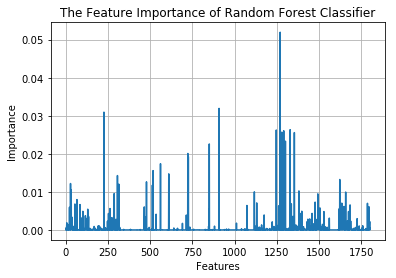

In [30]:
# compute the importance of the features under random forest classification
rfc_clf.fit(data, classType)
print('The Feature Importance of Random Forest Classifier = \n',rfc_clf.feature_importances_)
plt.plot(rfc_clf.feature_importances_)
plt.title('The Feature Importance of Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

The Feature Importance of Decision Tree Classifier = 
 [ 0.00022272  0.          0.         ...,  0.          0.          0.        ]


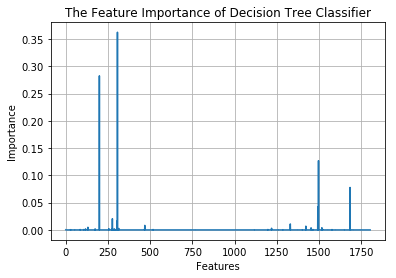

In [31]:
# compute the importance of the features under decision tree classification
dtc_clf.fit(data, classType)
print('The Feature Importance of Decision Tree Classifier = \n',dtc_clf.feature_importances_)
plt.plot(dtc_clf.feature_importances_)
plt.title('The Feature Importance of Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

The Feature Importance of Extra Trees Classifier = 
 [ 0.00057527  0.00032946  0.00034836 ...,  0.          0.00714435
  0.00240402]


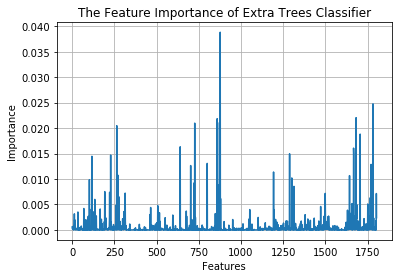

In [32]:
# compute the importance of the features under extra trees classification
etc_clf.fit(data, classType)
print('The Feature Importance of Extra Trees Classifier = \n',etc_clf.feature_importances_)
plt.plot(etc_clf.feature_importances_)
plt.title('The Feature Importance of Extra Trees Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

The Feature Importance of AdaBoost Classifier = 
 [ 0.  0.  0. ...,  0.  0.  0.]


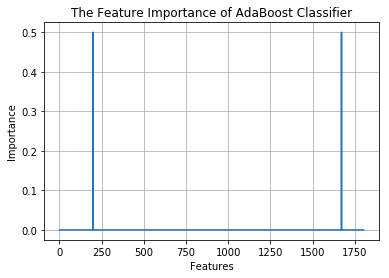

In [33]:
# compute the importance of the features under AdaBoost classification
abc_clf.fit(data, classType)
print('The Feature Importance of AdaBoost Classifier = \n',abc_clf.feature_importances_)
plt.plot(abc_clf.feature_importances_)
plt.title('The Feature Importance of AdaBoost Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

In [34]:
# compute the importance of the features under K Nearest Neighbors classification
knn_clf.fit(data, classType)
print('The Feature Importance of K Nearest Neighbors Classifier = \n',knn_clf.feature_importances_)
plt.plot(knn_clf.feature_importances_)
plt.title('The Feature Importance of K Nearest Neighbors Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

## 6. Select Three Types of Features

From previous analysis results, we can realize that some of features does not help for classification during this process, hence, we attempted to divide into three types of feature type as follows. <br />
1. top 10 useful features
2. all useful features
3. all useless features

(p.s. for no.2 and no.3:: because the numbers of features are quite large, we also showed the numbers.)

### 6.1 Get the Importance Index

In [24]:
# random forest classification
# export the importance and obtain the sorting index
rfc_featureImportance = rfc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
rfc_getIndex = np.argsort(rfc_featureImportance)

In [24]:
# decision tree classification
# export the importance and obtain the sorting index
dtc_featureImportance = dtc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
dtc_getIndex = np.argsort(dtc_featureImportance)

In [24]:
# extra trees classification
# export the importance and obtain the sorting index
etc_featureImportance = etc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
etc_getIndex = np.argsort(etc_featureImportance)

In [24]:
# AdaBoost classification
# export the importance and obtain the sorting index
abc_featureImportance = abc_clf.feature_importances_
# get the sorting index by argsort function from numpy package
abc_getIndex = np.argsort(abc_featureImportance)

In [24]:
# K Nearest Neighbors classification
# export the importance and obtain the sorting index
knn_featureImportance = knn_clf.feature_importances_
# get the sorting index by argsort function from numpy package
knn_getIndex = np.argsort(knn_featureImportance)

### 6.2 Sort the Importance and Features via Importance Index

In [25]:
# random forest classidication
# sort the importance
rfc_imSorted = rfc_featureImportance[rfc_getIndex]
print('The Feature Importance Sorting Result of Random Forest Classification\n',rfc_imSorted)
# sort the features
rfc_dataImSorted = np.asarray(data.columns[rfc_getIndex])
print('The Feature Sorting Result of Random Forest Classificatio\n',rfc_dataImSorted)

The Feature Importance Sorting Result
 [ 0.          0.          0.         ...,  0.03094596  0.03192617
  0.05194113]
The Feature Sorting Result
 ['SHGetFileInfoA' 'CreateMenu' 'GetStringTypeExA' ...,
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [25]:
# decision tree classidication
# sort the importance
dtc_imSorted = dtc_featureImportance[dtc_getIndex]
print('The Feature Importance Sorting Result of Decision Tree Classification\n',dtc_imSorted)
# sort the features
dtc_dataImSorted = np.asarray(data.columns[dtc_getIndex])
print('The Feature Sorting Result of Decision Tree Classificatio\n',dtc_dataImSorted)

The Feature Importance Sorting Result
 [ 0.          0.          0.         ...,  0.03094596  0.03192617
  0.05194113]
The Feature Sorting Result
 ['SHGetFileInfoA' 'CreateMenu' 'GetStringTypeExA' ...,
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [25]:
# extra trees classidication
# sort the importance
etc_imSorted = etc_featureImportance[etc_getIndex]
print('The Feature Importance Sorting Result of Extra Trees Classification\n',etc_imSorted)
# sort the features
etc_dataImSorted = np.asarray(data.columns[etc_getIndex])
print('The Feature Sorting Result of Extra Trees Classificatio\n',etc_dataImSorted)

The Feature Importance Sorting Result
 [ 0.          0.          0.         ...,  0.03094596  0.03192617
  0.05194113]
The Feature Sorting Result
 ['SHGetFileInfoA' 'CreateMenu' 'GetStringTypeExA' ...,
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [25]:
# AdaBoost classidication
# sort the importance
abc_imSorted = abc_featureImportance[abc_getIndex]
print('The Feature Importance Sorting Result of AdaBoost Classification\n',abc_imSorted)
# sort the features
abc_dataImSorted = np.asarray(data.columns[abc_getIndex])
print('The Feature Sorting Result of AdaBoost Classificatio\n',abc_dataImSorted)

The Feature Importance Sorting Result
 [ 0.          0.          0.         ...,  0.03094596  0.03192617
  0.05194113]
The Feature Sorting Result
 ['SHGetFileInfoA' 'CreateMenu' 'GetStringTypeExA' ...,
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [25]:
# K Nearest Neighbors classidication
# sort the importance
knn_imSorted = knn_featureImportance[knn_getIndex]
print('The Feature Importance Sorting Result of K Nearest Neighbors Classification\n',knn_imSorted)
# sort the features
knn_dataImSorted = np.asarray(data.columns[knn_getIndex])
print('The Feature Sorting Result of K Nearest Neighbors Classificatio\n',knn_dataImSorted)

The Feature Importance Sorting Result
 [ 0.          0.          0.         ...,  0.03094596  0.03192617
  0.05194113]
The Feature Sorting Result
 ['SHGetFileInfoA' 'CreateMenu' 'GetStringTypeExA' ...,
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


### 6.3 Plot the Importance Distribution

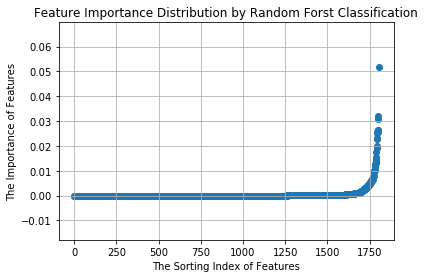

In [26]:
# feature importance distribution by random forst classification
plt.scatter(np.arange(len(rfc_imSorted)),rfc_imSorted)
plt.title('Feature Importance Distribution by Random Forst Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

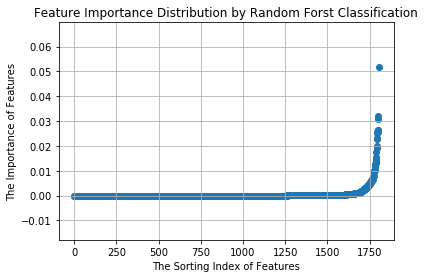

In [26]:
# feature importance distribution by decision tree classification
plt.scatter(np.arange(len(dtc_imSorted)),dtc_imSorted)
plt.title('Feature Importance Distribution by Decision Tree Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

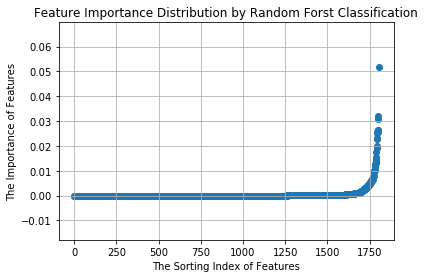

In [26]:
# feature importance distribution by extra trees classification
plt.scatter(np.arange(len(etc_imSorted)),etc_imSorted)
plt.title('Feature Importance Distribution by Extra Trees Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

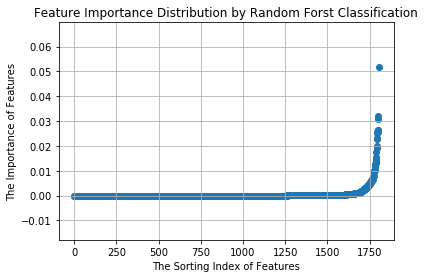

In [26]:
# feature importance distribution by AdaBoost classification
plt.scatter(np.arange(len(abc_imSorted)),abc_imSorted)
plt.title('Feature Importance Distribution by AdaBoost Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

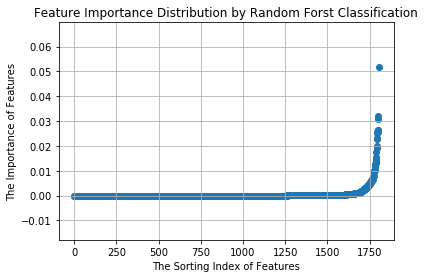

In [26]:
# feature importance distribution by K Nearest Neighbors classification
plt.scatter(np.arange(len(knn_imSorted)),knn_imSorted)
plt.title('Feature Importance Distribution by K Nearest Neighbors Classification')
plt.xlabel('The Sorting Index of Features')
plt.ylabel('The Importance of Features')
plt.grid(True)
plt.show()

### 6.4 Top 10 Useful Features

In [27]:
# get the top 10 useful features via random forest classification
print('Top 10 Useful Features via Random Forest Classification\n',rfc_dataImSorted[-10:len(rfc_dataImSorted)])

Top 10 Useful Features
 ['TB_b8' 'TB_98' 'TB_ed' 'TB_a3' 'TB_ae' 'TB_82' 'TB_d4'
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [27]:
# get the top 10 useful features via decision tree classification
print('Top 10 Useful Features via Decision Tree Classification\n',dtc_dataImSorted[-10:len(dtc_dataImSorted)])

Top 10 Useful Features
 ['TB_b8' 'TB_98' 'TB_ed' 'TB_a3' 'TB_ae' 'TB_82' 'TB_d4'
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [27]:
# get the top 10 useful features via extra trees classification
print('Top 10 Useful Features via Extra Trees Classification\n',etc_dataImSorted[-10:len(etc_dataImSorted)])

Top 10 Useful Features
 ['TB_b8' 'TB_98' 'TB_ed' 'TB_a3' 'TB_ae' 'TB_82' 'TB_d4'
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [27]:
# get the top 10 useful features via AdaBoost classification
print('Top 10 Useful Features via AdaBoost Classification\n',abc_dataImSorted[-10:len(abc_dataImSorted)])

Top 10 Useful Features
 ['TB_b8' 'TB_98' 'TB_ed' 'TB_a3' 'TB_ae' 'TB_82' 'TB_d4'
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


In [27]:
# get the top 10 useful features via K Nearest Neighbors classification
print('Top 10 Useful Features via K Nearest Neighbors Classification\n',knn_dataImSorted[-10:len(knn_dataImSorted)])

Top 10 Useful Features
 ['TB_b8' 'TB_98' 'TB_ed' 'TB_a3' 'TB_ae' 'TB_82' 'TB_d4'
 'ent_q_diff_diffs_2_median' 'strncpy' 'TB_99']


### 6.5 All Useful Features

In [28]:
# get all useful features via random forest classification
print('The Number of Useful Features via Random Forest Classification\n',len(rfc_dataImSorted[rfc_featureImportance>0]))
print('\nAll Useful Features via Random Forest Classification\n', rfc_dataImSorted[rfc_featureImportance>0])

The Number of Useful Features
 793

All Useful Features
 ['SHGetFileInfoA' 'GetStringTypeExA' 'RegisterClipboardFormatA'
 'DestroyCursor' 'Img5.1' 'LoadLibraryW' 'DeleteMenu' '__vbaSetSystemError'
 'DrawIconEx' 'EnumThreadWindows' 'DrawMenuBar' '__vbaVarMove' 'SetPixel'
 'AppendMenuA' 'GetScrollPos' 'atoi' 'Img106' '__dllonexit' 'strstr'
 '__vbaVarDup' 'VariantInit' 'SHFileOperationA' 'SetScrollPos' 'WinHelpA'
 'GetDriveTypeA' 'ShowOwnedPopups' 'ExcludeClipRect' 'CreateDIBitmap'
 '__vbaFreeStrList' '__vbaFreeVarList' 'EqualRect' 'RemovePropA'
 'WindowFromPoint' '__vbaHresultCheckObj' '__vbaFreeStr' 'RedrawWindow'
 'RectVisible' 'AdjustTokenPrivileges' 'ImageList_SetIconSize' 'LoadImageA'
 'SHGetPathFromIDListA' 'CharLowerA' 'GetIconInfo' 'GetKeyboardState'
 '__p__commode' 'UnmapViewOfFile' 'IsRectEmpty' 'SetROP2' '__vbaObjSet'
 'TranslateMDISysAccel' 'ImageList_DragEnter' 'GetPaletteEntries'
 'GetBitmapBits' 'SendMessageTimeoutA' 'GetDIBColorTable'
 'ImageList_EndDrag' 'ImageList_GetIc

In [28]:
# get all useful features via decision tree classification
print('The Number of Useful Features via Decision Tree Classification\n',len(dtc_dataImSorted[dtc_featureImportance>0]))
print('\nAll Useful Features via Decision Tree Classification\n', dtc_dataImSorted[dtc_featureImportance>0])

The Number of Useful Features
 793

All Useful Features
 ['SHGetFileInfoA' 'GetStringTypeExA' 'RegisterClipboardFormatA'
 'DestroyCursor' 'Img5.1' 'LoadLibraryW' 'DeleteMenu' '__vbaSetSystemError'
 'DrawIconEx' 'EnumThreadWindows' 'DrawMenuBar' '__vbaVarMove' 'SetPixel'
 'AppendMenuA' 'GetScrollPos' 'atoi' 'Img106' '__dllonexit' 'strstr'
 '__vbaVarDup' 'VariantInit' 'SHFileOperationA' 'SetScrollPos' 'WinHelpA'
 'GetDriveTypeA' 'ShowOwnedPopups' 'ExcludeClipRect' 'CreateDIBitmap'
 '__vbaFreeStrList' '__vbaFreeVarList' 'EqualRect' 'RemovePropA'
 'WindowFromPoint' '__vbaHresultCheckObj' '__vbaFreeStr' 'RedrawWindow'
 'RectVisible' 'AdjustTokenPrivileges' 'ImageList_SetIconSize' 'LoadImageA'
 'SHGetPathFromIDListA' 'CharLowerA' 'GetIconInfo' 'GetKeyboardState'
 '__p__commode' 'UnmapViewOfFile' 'IsRectEmpty' 'SetROP2' '__vbaObjSet'
 'TranslateMDISysAccel' 'ImageList_DragEnter' 'GetPaletteEntries'
 'GetBitmapBits' 'SendMessageTimeoutA' 'GetDIBColorTable'
 'ImageList_EndDrag' 'ImageList_GetIc

In [28]:
# get all useful features via extra trees classification
print('The Number of Useful Features via Extra Trees Classification\n',len(etc_dataImSorted[etc_featureImportance>0]))
print('\nAll Useful Features via Extra Trees Classification\n', etc_dataImSorted[etc_featureImportance>0])

The Number of Useful Features
 793

All Useful Features
 ['SHGetFileInfoA' 'GetStringTypeExA' 'RegisterClipboardFormatA'
 'DestroyCursor' 'Img5.1' 'LoadLibraryW' 'DeleteMenu' '__vbaSetSystemError'
 'DrawIconEx' 'EnumThreadWindows' 'DrawMenuBar' '__vbaVarMove' 'SetPixel'
 'AppendMenuA' 'GetScrollPos' 'atoi' 'Img106' '__dllonexit' 'strstr'
 '__vbaVarDup' 'VariantInit' 'SHFileOperationA' 'SetScrollPos' 'WinHelpA'
 'GetDriveTypeA' 'ShowOwnedPopups' 'ExcludeClipRect' 'CreateDIBitmap'
 '__vbaFreeStrList' '__vbaFreeVarList' 'EqualRect' 'RemovePropA'
 'WindowFromPoint' '__vbaHresultCheckObj' '__vbaFreeStr' 'RedrawWindow'
 'RectVisible' 'AdjustTokenPrivileges' 'ImageList_SetIconSize' 'LoadImageA'
 'SHGetPathFromIDListA' 'CharLowerA' 'GetIconInfo' 'GetKeyboardState'
 '__p__commode' 'UnmapViewOfFile' 'IsRectEmpty' 'SetROP2' '__vbaObjSet'
 'TranslateMDISysAccel' 'ImageList_DragEnter' 'GetPaletteEntries'
 'GetBitmapBits' 'SendMessageTimeoutA' 'GetDIBColorTable'
 'ImageList_EndDrag' 'ImageList_GetIc

In [28]:
# get all useful features via AdaBoost classicaition
print('The Number of Useful Features via AdaBoost Classification\n',len(abc_dataImSorted[abc_featureImportance>0]))
print('\nAll Useful Features via AdaBoost Classification\n', abc_dataImSorted[abc_featureImportance>0])

The Number of Useful Features
 793

All Useful Features
 ['SHGetFileInfoA' 'GetStringTypeExA' 'RegisterClipboardFormatA'
 'DestroyCursor' 'Img5.1' 'LoadLibraryW' 'DeleteMenu' '__vbaSetSystemError'
 'DrawIconEx' 'EnumThreadWindows' 'DrawMenuBar' '__vbaVarMove' 'SetPixel'
 'AppendMenuA' 'GetScrollPos' 'atoi' 'Img106' '__dllonexit' 'strstr'
 '__vbaVarDup' 'VariantInit' 'SHFileOperationA' 'SetScrollPos' 'WinHelpA'
 'GetDriveTypeA' 'ShowOwnedPopups' 'ExcludeClipRect' 'CreateDIBitmap'
 '__vbaFreeStrList' '__vbaFreeVarList' 'EqualRect' 'RemovePropA'
 'WindowFromPoint' '__vbaHresultCheckObj' '__vbaFreeStr' 'RedrawWindow'
 'RectVisible' 'AdjustTokenPrivileges' 'ImageList_SetIconSize' 'LoadImageA'
 'SHGetPathFromIDListA' 'CharLowerA' 'GetIconInfo' 'GetKeyboardState'
 '__p__commode' 'UnmapViewOfFile' 'IsRectEmpty' 'SetROP2' '__vbaObjSet'
 'TranslateMDISysAccel' 'ImageList_DragEnter' 'GetPaletteEntries'
 'GetBitmapBits' 'SendMessageTimeoutA' 'GetDIBColorTable'
 'ImageList_EndDrag' 'ImageList_GetIc

In [28]:
# get all useful features via K Nearest Neighbors classification
print('The Number of Useful Features via K Nearest Neighbors Classification\n',len(knn_dataImSorted[knn_featureImportance>0]))
print('\nAll Useful Features via K Nearest Neighbors Classification\n', knn_dataImSorted[knn_featureImportance>0])

The Number of Useful Features
 793

All Useful Features
 ['SHGetFileInfoA' 'GetStringTypeExA' 'RegisterClipboardFormatA'
 'DestroyCursor' 'Img5.1' 'LoadLibraryW' 'DeleteMenu' '__vbaSetSystemError'
 'DrawIconEx' 'EnumThreadWindows' 'DrawMenuBar' '__vbaVarMove' 'SetPixel'
 'AppendMenuA' 'GetScrollPos' 'atoi' 'Img106' '__dllonexit' 'strstr'
 '__vbaVarDup' 'VariantInit' 'SHFileOperationA' 'SetScrollPos' 'WinHelpA'
 'GetDriveTypeA' 'ShowOwnedPopups' 'ExcludeClipRect' 'CreateDIBitmap'
 '__vbaFreeStrList' '__vbaFreeVarList' 'EqualRect' 'RemovePropA'
 'WindowFromPoint' '__vbaHresultCheckObj' '__vbaFreeStr' 'RedrawWindow'
 'RectVisible' 'AdjustTokenPrivileges' 'ImageList_SetIconSize' 'LoadImageA'
 'SHGetPathFromIDListA' 'CharLowerA' 'GetIconInfo' 'GetKeyboardState'
 '__p__commode' 'UnmapViewOfFile' 'IsRectEmpty' 'SetROP2' '__vbaObjSet'
 'TranslateMDISysAccel' 'ImageList_DragEnter' 'GetPaletteEntries'
 'GetBitmapBits' 'SendMessageTimeoutA' 'GetDIBColorTable'
 'ImageList_EndDrag' 'ImageList_GetIc

### 6.6 All Useless Features

In [29]:
# get all useless features via random forest classification
print('The Number of Usefuless Features via Random Forest Classification\n',len(rfc_dataImSorted[rfc_featureImportance==0]))
print('\nAll Useless Features via Random Forest Classification\n', rfc_dataImSorted[rfc_featureImportance==0])

The Number of Usefuless Features
 1011

All Useless Features
 ['CreateMenu' '__vbaOnError' 'CreateToolhelp32Snapshot' ..., 'TB_00'
 'GetCommandLineA' 'strncpy']


In [29]:
# get all useless features via decision tree classification
print('The Number of Usefuless Features via Decision Tree Classification\n',len(dtc_dataImSorted[dtc_featureImportance==0]))
print('\nAll Useless Features via Decision Tree Classification\n', dtc_dataImSorted[dtc_featureImportance==0])

The Number of Usefuless Features
 1011

All Useless Features
 ['CreateMenu' '__vbaOnError' 'CreateToolhelp32Snapshot' ..., 'TB_00'
 'GetCommandLineA' 'strncpy']


In [29]:
# get all useless features via extra trees classification
print('The Number of Usefuless Features via Extra Trees Classification\n',len(etc_dataImSorted[etc_featureImportance==0]))
print('\nAll Useless Features via Extra Trees Classification\n', etc_dataImSorted[etc_featureImportance==0])

The Number of Usefuless Features
 1011

All Useless Features
 ['CreateMenu' '__vbaOnError' 'CreateToolhelp32Snapshot' ..., 'TB_00'
 'GetCommandLineA' 'strncpy']


In [29]:
# get all useless features via AdaBoost classification
print('The Number of Usefuless Features via AdaBoost Classification\n',len(abc_dataImSorted[abc_featureImportance==0]))
print('\nAll Useless Features via AdaBoost Classification\n', abc_dataImSorted[abc_featureImportance==0])

The Number of Usefuless Features
 1011

All Useless Features
 ['CreateMenu' '__vbaOnError' 'CreateToolhelp32Snapshot' ..., 'TB_00'
 'GetCommandLineA' 'strncpy']


In [29]:
# get all useless features via K Nearest Neighbors classification
print('The Number of Usefuless Features via K Nearest Neighbors Classification\n',len(knn_dataImSorted[knn_featureImportance==0]))
print('\nAll Useless Features via K Nearest Neighbors Classification\n', knn_dataImSorted[knn_featureImportance==0])

The Number of Usefuless Features
 1011

All Useless Features
 ['CreateMenu' '__vbaOnError' 'CreateToolhelp32Snapshot' ..., 'TB_00'
 'GetCommandLineA' 'strncpy']


# Part III. Compute Test Dataset

## 1. Random Forest Classification

## 2. Decision Tree Classification

## 3. Extra Trees Classification

## 4. AdaBoost Classification

## 5. K Nearest Neighbors Classification

# Part IV. Model Comparison

## 1. Training Dataset

## 2. Test Dataset